<a href="https://colab.research.google.com/github/ksasi/EIP/blob/master/EIP4.0/Phase1/Session3%20-%20Assignments/Assignment3_EIP4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!nvidia-smi

Tue Dec  3 05:22:35 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    37W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
!python -V

Python 3.6.8


In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 41kB/s 
     |████████████████████████████████| 450kB 30.9MB/s 
     |████████████████████████████████| 3.8MB 28.2MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goog

In [0]:
import numpy as np
import tensorflow as tf

from tensorflow.keras import backend as K
import time
import matplotlib.pyplot as plt

% matplotlib inline
np.random.seed(2017) 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dense, Dropout, BatchNormalization, SeparableConv2D, GlobalAveragePooling2D
from tensorflow.keras import utils

from tensorflow.keras.datasets import cifar10

print(tf.version.VERSION)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


In [0]:

#tf.compat.v1.enable_eager_execution()
tf.compat.v1.disable_eager_execution()

In [0]:

(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 11s 0us/step


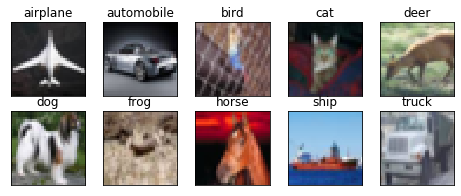

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = utils.to_categorical(train_labels, num_classes)
test_labels = utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()

model.add(Conv2D(filters = 48, kernel_size = (3, 3), padding = 'same', input_shape=(32, 32, 3), use_bias = False))
model.add(Activation('relu'))
model.add(Conv2D(filters = 48, kernel_size = (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 96, kernel_size = (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(filters = 96, kernel_size = (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 192, kernel_size = (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(filters = 192, kernel_size = (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 48)        1296      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 48)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 96)        4

Using TensorFlow backend.


Epoch 1/50
391/391 [==============================] - 25s 64ms/step - loss: 2.0069 - accuracy: 0.2191 - val_loss: 1.6541 - val_accuracy: 0.3766
Epoch 2/50
391/391 [==============================] - 19s 50ms/step - loss: 1.4930 - accuracy: 0.4542 - val_loss: 1.2591 - val_accuracy: 0.5460
Epoch 3/50
391/391 [==============================] - 19s 49ms/step - loss: 1.2025 - accuracy: 0.5718 - val_loss: 1.0125 - val_accuracy: 0.6452
Epoch 4/50
391/391 [==============================] - 19s 49ms/step - loss: 1.0386 - accuracy: 0.6374 - val_loss: 0.9054 - val_accuracy: 0.6820
Epoch 5/50
391/391 [==============================] - 19s 49ms/step - loss: 0.9240 - accuracy: 0.6779 - val_loss: 0.8456 - val_accuracy: 0.7129
Epoch 6/50
391/391 [==============================] - 19s 49ms/step - loss: 0.8478 - accuracy: 0.7080 - val_loss: 0.7761 - val_accuracy: 0.7327
Epoch 7/50
391/391 [==============================] - 19s 49ms/step - loss: 0.7935 - accuracy: 0.7291 - val_loss: 0.7540 - val_accuracy:

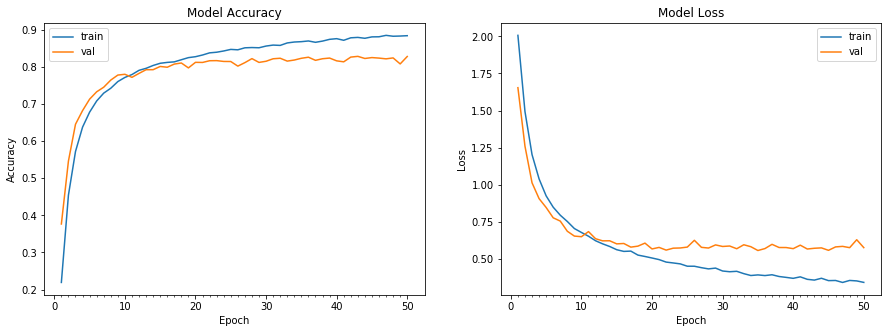

Accuracy on test data is: 82.78


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                epochs = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:


# Define the model
model = Sequential()

model.add(SeparableConv2D(filters = 48, kernel_size = (3, 3), padding = 'same', input_shape=(32, 32, 3), use_bias = False)) # Receptive field 3x3, Output Channel Size 32x32
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(SeparableConv2D(filters = 96, kernel_size = (3, 3), padding = 'same', use_bias = False)) # Receptive field 5x5, Output Channel Size 32x32
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(SeparableConv2D(filters = 192, kernel_size = (3, 3), padding = 'same', use_bias = False)) # Receptive field 7x7, Output Channel Size 32x32
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(SeparableConv2D(filters = 32, kernel_size = (1, 1), padding = 'same', use_bias = False)) # Receptive field 7x7, Output Channel Size  32x32
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2))) # Receptive field 8x8, Output Channel Size  16x16
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 48, kernel_size = (3, 3), padding = 'same', use_bias = False)) # Receptive field 12x12, Output Channel Size  16x16
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(SeparableConv2D(filters = 96, kernel_size = (3, 3), padding = 'same', use_bias = False)) # Receptive field 16x16, Output Channel Size  16x16
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(SeparableConv2D(filters = 192, kernel_size = (3, 3), padding = 'same', use_bias = False)) # Receptive field 20x20, Output Channel Size  16x16
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(SeparableConv2D(filters = 32, kernel_size = (1, 1), padding = 'same', use_bias = False))  # Receptive field 20x20, Output Channel Size  16x16
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))  # Receptive field 22x22, Output Channel Size  8x8
model.add(Dropout(0.1))


model.add(SeparableConv2D(filters = 48, kernel_size = (3, 3), padding = 'same', use_bias = False)) # Receptive field 30x30, Output Channel Size  8x8
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(SeparableConv2D(filters = 96, kernel_size = (3, 3), padding = 'same', use_bias = False)) # Receptive field 38x38, Output Channel Size  8x8
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(SeparableConv2D(filters = 192, kernel_size = (3, 3), padding = 'same', use_bias = False)) # Receptive field 46x46, Output Channel Size  8x8
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2))) # Receptive field 50x50, Output Channel Size  4x4
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 10, kernel_size = (1, 1), padding = 'same', use_bias = False)) # Receptive field 50x50, Output Channel Size  4x4

model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_59 (Separab (None, 32, 32, 48)        171       
_________________________________________________________________
activation_62 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_56 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
separable_conv2d_60 (Separab (None, 32, 32, 96)        5040      
_________________________________________________________________
activation_63 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
batch_normalization_57 (Batc (None, 32, 32, 96)        384       
_________________________________________________________________
separable_conv2d_61 (Separab (None, 32, 32, 192)      

Epoch 1/50
391/391 [==============================] - 60s 155ms/step - loss: 1.4292 - accuracy: 0.4694 - val_loss: 2.7272 - val_accuracy: 0.1000
Epoch 2/50
391/391 [==============================] - 47s 121ms/step - loss: 1.0240 - accuracy: 0.6316 - val_loss: 1.0199 - val_accuracy: 0.6311
Epoch 3/50
391/391 [==============================] - 47s 121ms/step - loss: 0.8724 - accuracy: 0.6884 - val_loss: 0.8880 - val_accuracy: 0.6959
Epoch 4/50
391/391 [==============================] - 47s 121ms/step - loss: 0.7684 - accuracy: 0.7284 - val_loss: 0.8447 - val_accuracy: 0.7129
Epoch 5/50
391/391 [==============================] - 47s 121ms/step - loss: 0.6979 - accuracy: 0.7539 - val_loss: 0.7828 - val_accuracy: 0.7356
Epoch 6/50
391/391 [==============================] - 47s 120ms/step - loss: 0.6421 - accuracy: 0.7734 - val_loss: 0.6912 - val_accuracy: 0.7658
Epoch 7/50
391/391 [==============================] - 47s 121ms/step - loss: 0.5989 - accuracy: 0.7901 - val_loss: 0.7250 - val_ac

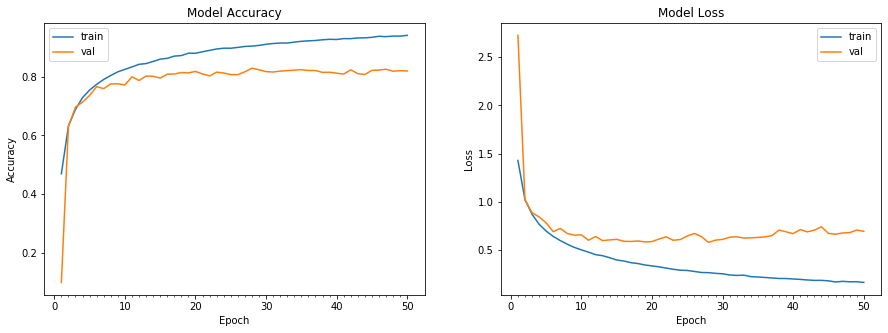

Accuracy on test data is: 81.89


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                epochs = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))